In [1]:
# import libraries
import pandas as pd
import sklearn
assert sklearn.__version__ >= ".20"

In [2]:
# read dataset
titanicDataset = pd.read_csv("train.csv")

In [3]:
titanicDataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# Drop categorical columns and drop NA
titanicDatasetUpdated = titanicDataset.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1)
titanicDatasetUpdated['Sex'] = titanicDatasetUpdated['Sex'].replace(['male','female'],[0,1])
titanicDatasetUpdated = titanicDatasetUpdated.dropna()
print(titanicDatasetUpdated)

     Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0           0       3    0  22.0      1      0   7.2500
1           1       1    1  38.0      1      0  71.2833
2           1       3    1  26.0      0      0   7.9250
3           1       1    1  35.0      1      0  53.1000
4           0       3    0  35.0      0      0   8.0500
..        ...     ...  ...   ...    ...    ...      ...
885         0       3    1  39.0      0      5  29.1250
886         0       2    0  27.0      0      0  13.0000
887         1       1    1  19.0      0      0  30.0000
889         1       1    0  26.0      0      0  30.0000
890         0       3    0  32.0      0      0   7.7500

[714 rows x 7 columns]


C:\Users\User\AppData\Local\Temp\ipykernel_71660\2101229225.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanicDatasetUpdated['Sex'] = titanicDatasetUpdated['Sex'].replace(['male','female'],[0,1])


In [9]:
# segment dataset
data = titanicDatasetUpdated.values[:,1:7]
print(data)

[[ 3.      0.     22.      1.      0.      7.25  ]
 [ 1.      1.     38.      1.      0.     71.2833]
 [ 3.      1.     26.      0.      0.      7.925 ]
 ...
 [ 1.      1.     19.      0.      0.     30.    ]
 [ 1.      0.     26.      0.      0.     30.    ]
 [ 3.      0.     32.      0.      0.      7.75  ]]


In [11]:
# segment dataset
target = titanicDatasetUpdated.values[:,0]
print(target)

[0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1.
 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.

In [13]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(data, target, test_size=0.30)
lm = LogisticRegression()
lm.fit(X_train, Y_train)
lm.predict_proba(X_test)
predicted = lm.predict(X_test)

In [15]:
# Print Confusion Matrix
from sklearn import metrics
confusionMatrix = metrics.confusion_matrix(Y_test, predicted)
print(confusionMatrix)

[[106  16]
 [ 31  62]]


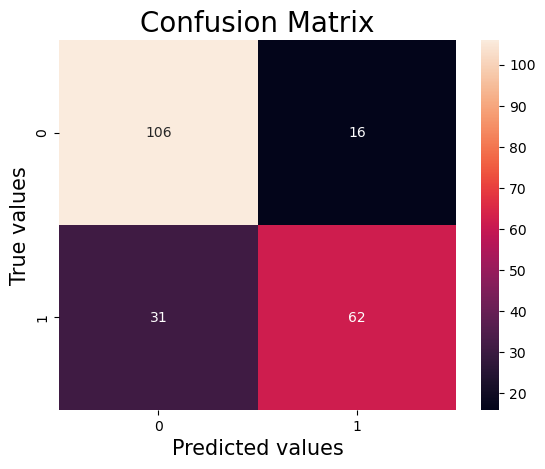

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt # for data visualization
# Print Confusion Matrix with seaborn
ax = sns.heatmap(confusionMatrix, annot=True, fmt='.0f')
plt.title('Confusion Matrix', fontsize = 20) # title with fontsize 20
plt.xlabel('Predicted values', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True values', fontsize = 15) # y-axis label with fontsize 15
plt.show()

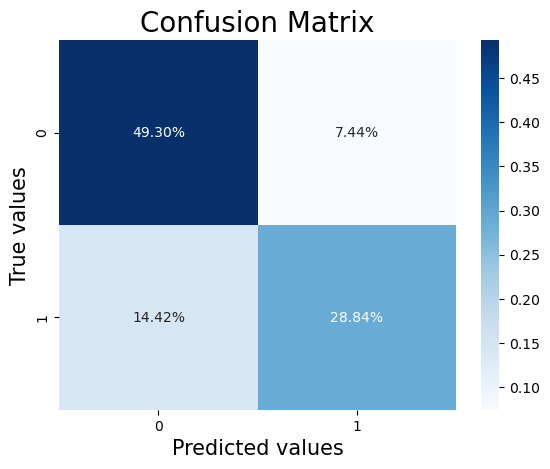

In [19]:
# Print Confusion Matrix with seaborn
import numpy as np
ax = sns.heatmap(confusionMatrix / np.sum(confusionMatrix), annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix', fontsize = 20) # title with fontsize 20
plt.xlabel('Predicted values', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True values', fontsize = 15) # y-axis label with fontsize 15
plt.show()

In [21]:
# Print Classification Report
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.77      0.87      0.82       122
         1.0       0.79      0.67      0.73        93

    accuracy                           0.78       215
   macro avg       0.78      0.77      0.77       215
weighted avg       0.78      0.78      0.78       215

